In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive
from matplotlib.figure import SubFigure


## Visualize Preprocessed Image (SoI Patch)

In [2]:
def plot_ct_image(x, y, z, image_file: str) -> None:
    image = np.load(image_file)

    print("Image File: {}".format(image_file))
    print(
        "Image: {} [min = {:.1f}, max = {:.1f}]".format(image.shape, np.min(image), np.max(image))
    )

    sf1: SubFigure
    sf2: SubFigure
    sf3: SubFigure
    fig = plt.figure(constrained_layout=True, figsize=(30, 10))
    sf1, sf2, sf3 = fig.subfigures(1, 3, wspace=0.12, width_ratios=[110, 60, 110])

    ax1 = sf1.add_axes([0, 0.03, 1, 0.9])
    ax2 = sf2.add_axes([0, 0.03, 1, 0.9])
    ax3 = sf3.add_axes([0, 1 - (60 / 80) - 0.01, 1, 0.9 * 60 / 80])

    ax1.imshow(image[:, y, :])
    ax1.set_xlabel("x", fontsize=25)
    ax1.set_ylabel("z", fontsize=25)
    ax1.tick_params(axis="both", labelsize=20)
    ax1.set_title("View from Front/Back", fontsize=35)
    sf1.suptitle("Coronal Plane", fontsize=45, fontweight="bold")

    ax2.imshow(image[:, :, x])
    ax2.set_xlabel("y", fontsize=25)
    ax2.set_ylabel("z", fontsize=25)
    ax2.tick_params(axis="both", labelsize=20)
    ax2.set_title("View from Side", fontsize=35)
    sf2.suptitle("Sagittal Plane", fontsize=45, fontweight="bold")

    ax3.imshow(image[z, :, :])
    ax3.set_xlabel("x", fontsize=25)
    ax3.set_ylabel("y", fontsize=25)
    ax3.tick_params(axis="both", labelsize=20)
    ax3.set_title("View from Top/Bottom", fontsize=35)
    sf3.suptitle("Axial Plane", fontsize=45, fontweight="bold")

    fig.show()


### SoI Center

Image File: /data_fae_uq/clavicle_ct/preprocessed/ae_1441_0_0.npy
Image: (80, 60, 110) [min = -1024.0, max = 2807.0]


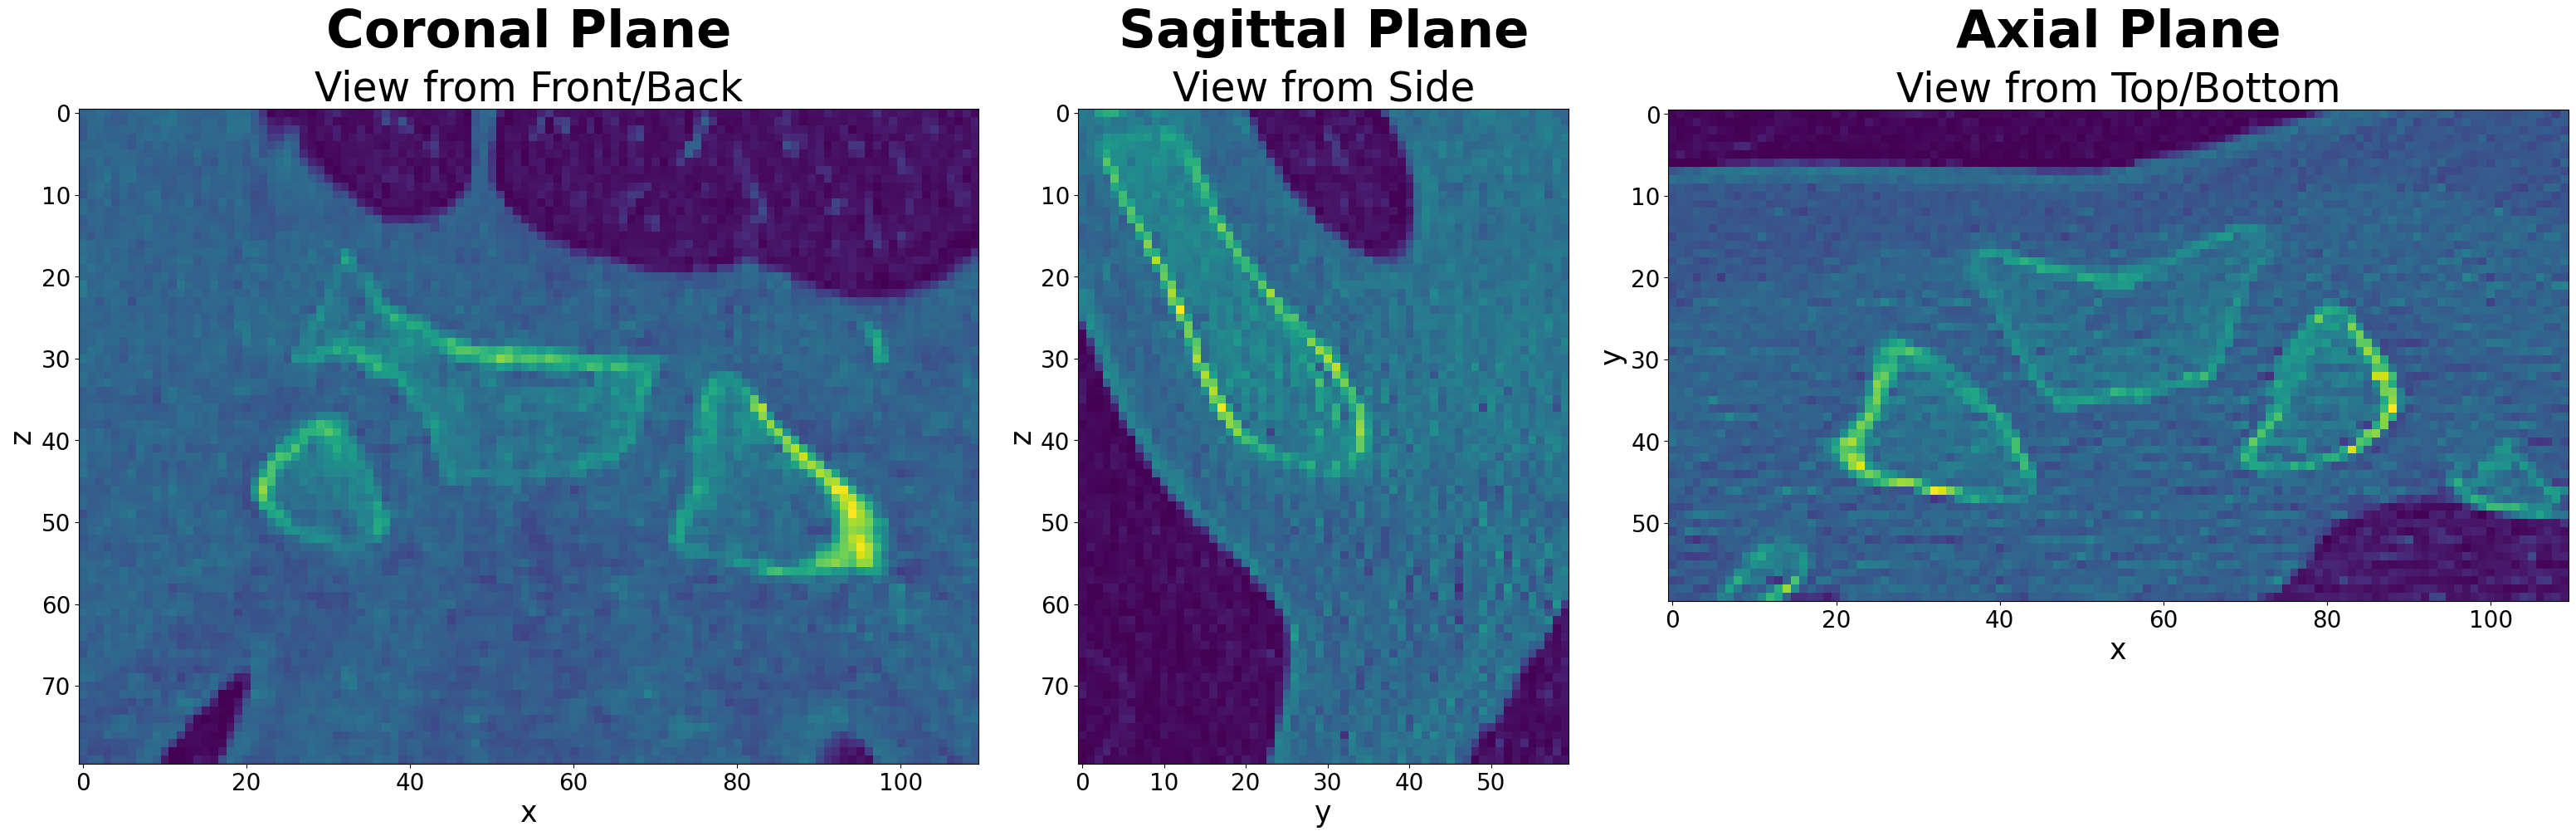

In [3]:
plot_ct_image(55, 30, 40, "/data_fae_uq/clavicle_ct/preprocessed/ae_1441_0_0.npy")


### Interactive

In [ ]:
%matplotlib inline

interactive(
    plot_ct_image,
    x=(0, 110-1),
    y=(0, 60-1),
    z=(0, 80-1),
    image_file="/data_fae_uq/clavicle_ct/preprocessed/ae_996_2_0.npy",
)
